In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(-10, 10, 500)
y = 0.5 * x**3 - 2 * x**2 + 3 * x + 5 + np.random.normal(scale=50, size=x.shape)

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Save to Excel
df.to_excel("D:/python/polynomial_regression_dataset.xlsx", index=False)
print("File saved as 'polynomial_regression_dataset.xlsx'")


File saved as 'polynomial_regression_dataset.xlsx'


Mean Squared Error: 2383.57
R² Score: 0.9513

Sample Predictions:
           x           y      y_pred
0 -10.000000 -700.164292 -732.854388
1  -9.959920 -724.205021 -725.058931
2  -9.919840 -677.253610 -717.318189
3  -9.879760 -625.887007 -709.631969
4  -9.839679 -706.200671 -702.000077
5  -9.799599 -698.708197 -694.422321
6  -9.759519 -600.602709 -686.898509
7  -9.719439 -633.807072 -679.428446
8  -9.679359 -688.321253 -672.011941
9  -9.639279 -630.441330 -664.648800

Predictions saved to 'polynomial_regression_with_predictions.xlsx'


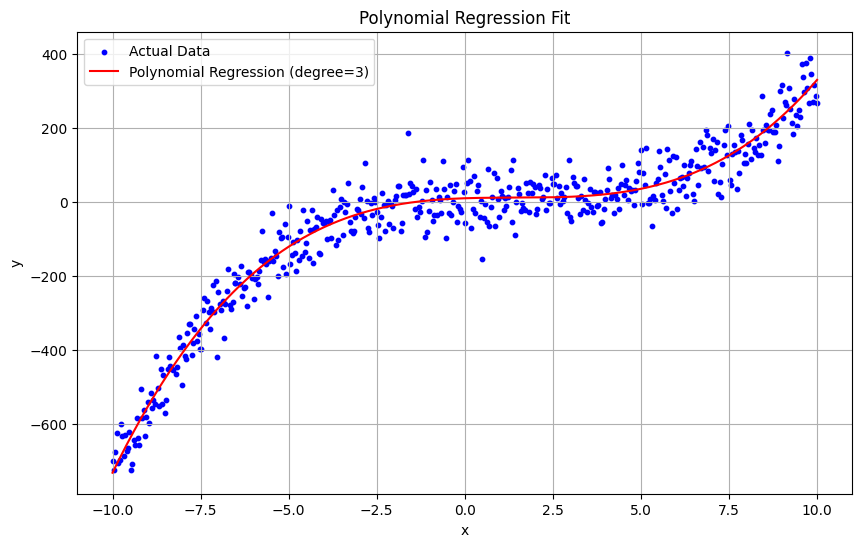

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_excel("D:/python/polynomial_regression_dataset.xlsx")

# Data Cleaning
if df.isnull().sum().any():
    df = df.dropna()

# Define features and target
X = df[['x']]
y = df['y']

# Polynomial Regression Model (degree = 3)
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Add predictions to DataFrame
df['y_pred'] = y_pred

# Evaluation Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Display some predictions
print("\nSample Predictions:")
print(df[['x', 'y', 'y_pred']].head(10))  # show top 10

# Optional: Save predictions to Excel
df.to_excel("D:/python/polynomial_regression_with_predictions.xlsx", index=False)
print("\nPredictions saved to 'polynomial_regression_with_predictions.xlsx'")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', s=10)
plt.plot(X, y_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.title("Polynomial Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



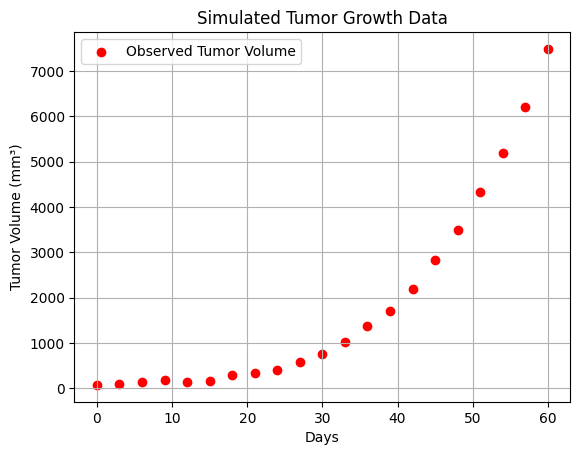

Train MSE: 857.01
Train R²: 0.9998
Test MSE: 1932.25
Test R²: 0.9994


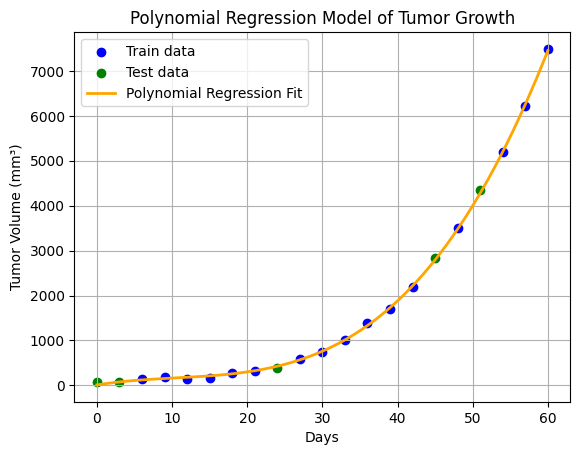

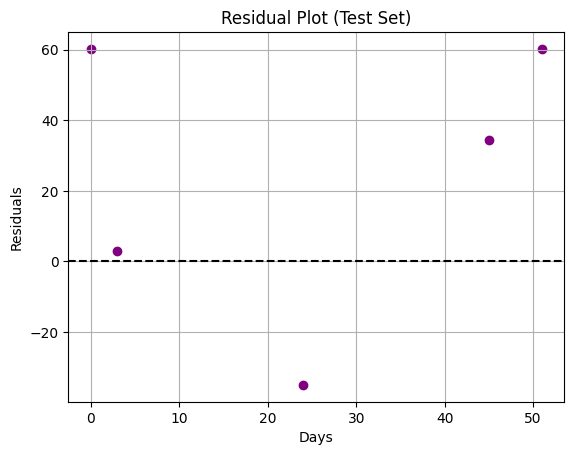

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Simulate tumor growth data (with some noise)
np.random.seed(42)

days = np.arange(0, 61, 3)  # every 3 days from 0 to 60
# True underlying model (cubic growth + some plateau effect)
true_volume = 0.05 * days**3 - 1.2 * days**2 + 15 * days + 50

# Add noise (measurement + biological variability)
noise = np.random.normal(0, 40, size=days.shape)
observed_volume = true_volume + noise

# Create DataFrame
df = pd.DataFrame({'Days': days, 'Tumor_Volume': observed_volume})

# 2. Plot the raw data
plt.scatter(df['Days'], df['Tumor_Volume'], color='red', label='Observed Tumor Volume')
plt.title('Simulated Tumor Growth Data')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm³)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Prepare data for modeling
X = df['Days'].values.reshape(-1, 1)
y = df['Tumor_Volume'].values

# 4. Split into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create polynomial features (degree 3)
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 6. Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 7. Predict on train and test
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# 8. Evaluate model
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")

# 9. Visualize the fit with full range prediction
X_range = np.linspace(0, 60, 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_range, y_range_pred, color='orange', linewidth=2, label='Polynomial Regression Fit')
plt.title('Polynomial Regression Model of Tumor Growth')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm³)')
plt.legend()
plt.grid(True)
plt.show()

# 10. Residual analysis on test set
residuals = y_test - y_test_pred
plt.scatter(X_test, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot (Test Set)')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()





In [ ]:
'''  
Conceptual Questions
What is polynomial regression? How does it differ from linear regression?

Why would you use polynomial regression instead of linear regression?

What are the potential drawbacks of using high-degree polynomial regression?

How do you choose the degree of the polynomial for regression?

What is overfitting in polynomial regression? How can you prevent it?

Explain how polynomial features are generated from the original features.

Can polynomial regression handle multivariate data? How?

What metrics would you use to evaluate a polynomial regression model?

How does regularization help in polynomial regression? Describe Ridge and Lasso briefly.

What issues might arise when extrapolating with polynomial regression?

Coding/Implementation Questions
Write a Python function to perform polynomial regression using scikit-learn.

How would you implement feature scaling in polynomial regression? Why is it important?

Given a dataset, how do you select the best polynomial degree programmatically?

How do you split data for training and testing in regression tasks?

Write code to plot residuals of a polynomial regression model and explain what they indicate.

How would you perform cross-validation for polynomial regression?

Explain how you would handle multicollinearity in polynomial regression features.

Applied/Scenario-Based Questions
Describe a real-life situation where polynomial regression would be a better choice than linear regression.

You modeled tumor growth with polynomial regression but noticed poor predictions after 70 days. What might be the reason?

How would you interpret the coefficients of a polynomial regression model?

If your polynomial regression model has a high R² on training data but low R² on test data, what does that mean and what would you do next?

How would you communicate the results of your polynomial regression model to a non-technical stakeholder?

'''